In [2]:
%pip install pedalboard
%pip install python-dotenv
%load_ext dotenv
%pip install soundfile
%pip install matplotlib
%pip install scipy
%pip install plotly==5.22.0
%pip install pandas
%dotenv


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from dotenv import dotenv_values
config = dotenv_values(".env") 

pluginsDir = config['PLUGIN_HOME']
tracksDir = config['TRACKS_HOME']
mixDir = config['MIX_HOME']

In [4]:
from pedalboard import load_plugin

proc2_path = pluginsDir + 'FabFilter Pro-C 2.vst3'
proc2 = load_plugin(proc2_path)

In [77]:
proc2.parameters
proc2.threshold = -48.3
proc2.auto_gain = True
proc2.range = 4
proc2.show_editor()


def smooth_curve(curve, window_size=101):
    # Apply moving average smoothing
    window = np.ones(window_size) / window_size
    smoothed_curve = np.convolve(curve, window, mode='same')
    return smoothed_curve

def calculate_gain_reduction(original, processed):
  noise = 0.0001
  gain_reduction = np.where(np.abs(original) < noise, 1, np.divide(np.abs(processed), np.abs(original)))
  return gain_reduction

def apply_gain_reduction(signal, gain_reduction):
    return np.array(signal) * gain_reduction

def normalize(audio):
    max_val = np.max(np.abs(audio))
    if max_val > 0:
        normalized = audio / max_val
    return normalized

def combine_signals(original, processed):
    combined = original + processed
    return normalize(combined)

In [74]:
import numpy as np
import matplotlib.pyplot as plt
def plot_waveforms(data1, title1='DAW Output'):
  plt.figure(figsize=(24, 5))
  plt.plot(data1, label=title1)
  plt.xlabel('Time [s]')
  plt.ylabel('Amplitude')
  plt.legend(loc='upper right')
  plt.show()


In [60]:
from pedalboard.io import AudioFile
from pedalboard import Pedalboard, Gain
import numpy as np



samplerate = 44100
f = AudioFile('./.playground/original.wav')
s = AudioFile('./.playground/sidechain.wav')
f.seek(67 * f.samplerate)  # Seek to the 67th second
s.seek(67 * s.samplerate)  # Seek to the 67th second
samplerate = f.samplerate

audio = f.read(10 * f.samplerate)  # Read 10 seconds of audio
sidechain = s.read(10 * s.samplerate)  # Read 10 seconds of audio
# plot_waveforms(audio[0], title1='Bass')
# plot_waveforms(sidechain[0], title1='Snare')


-0.8456727 0.9006654


C:\Users\Yogesh\AppData\Local\Temp\ipykernel_19132\331668449.py:16: RuntimeWarning: invalid value encountered in divide
  gain_reduction = np.where(np.abs(original) < noise, 1, np.divide((np.abs(processed)), (np.abs(original))))


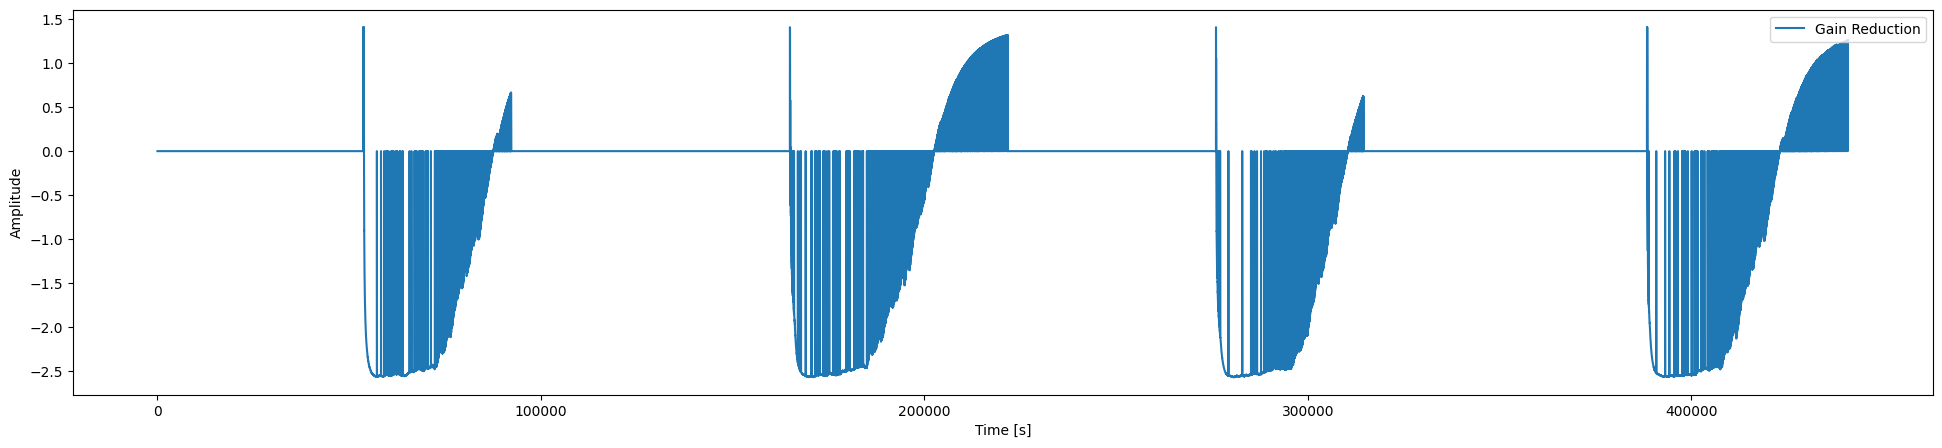

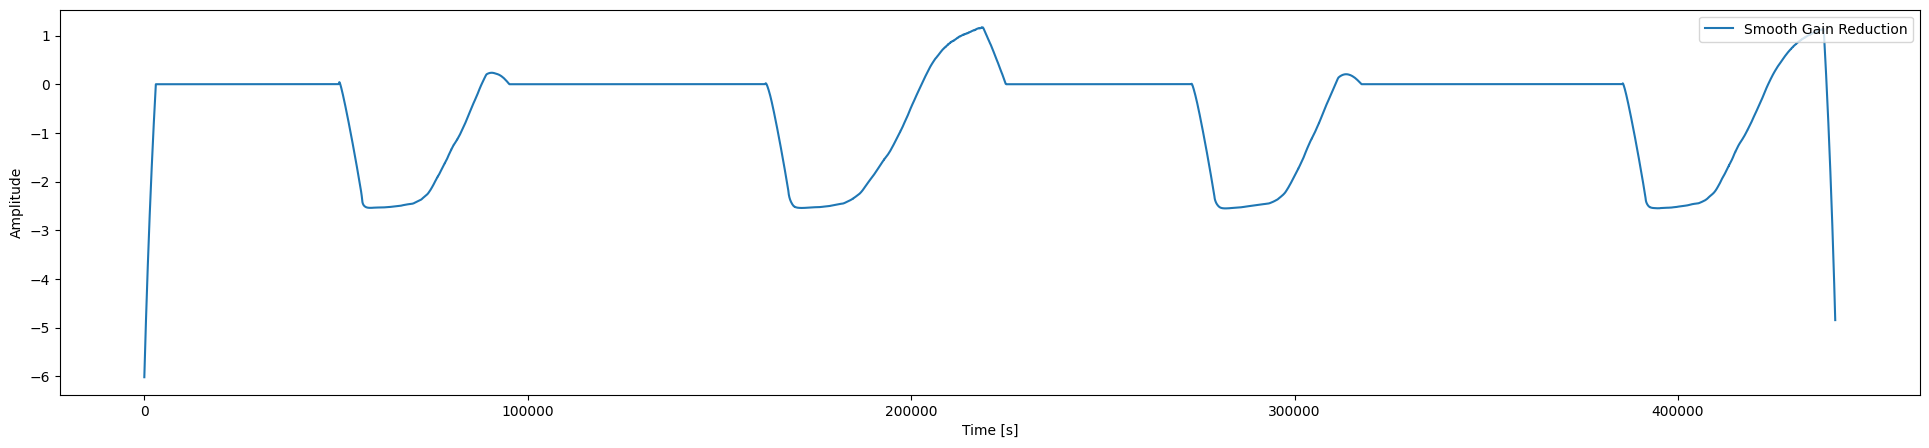

0.7441766 1.1758072


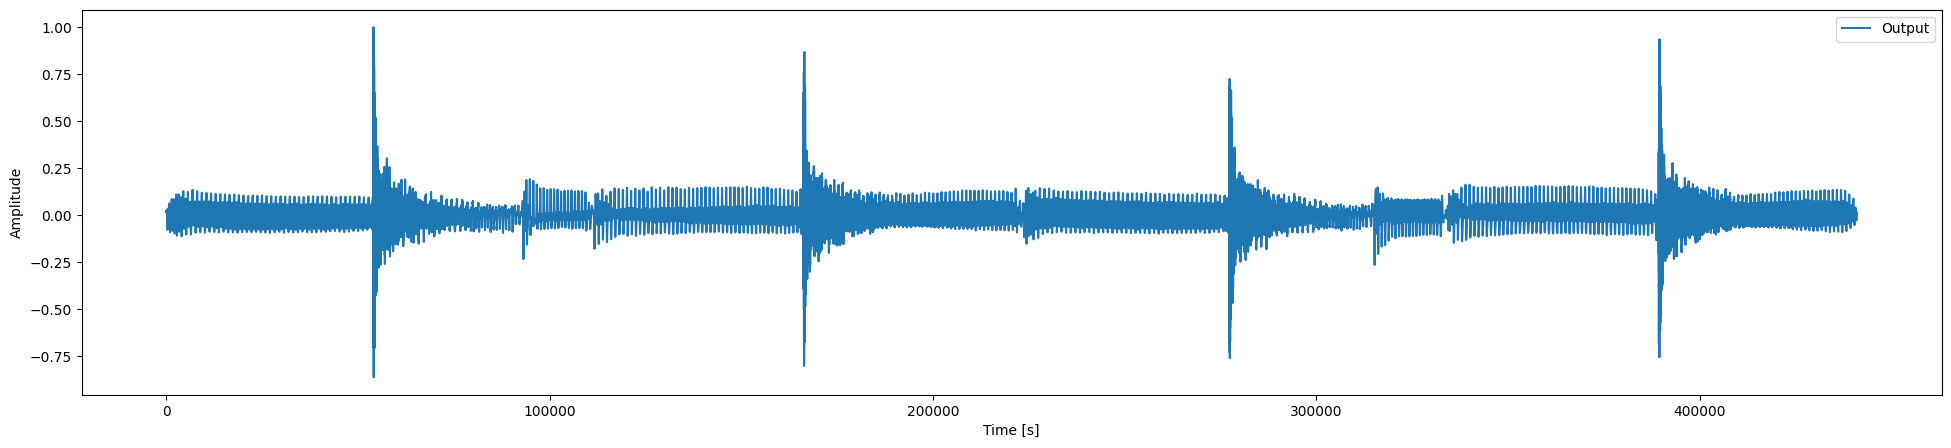

In [88]:
sidechainBoard = Pedalboard([proc2])
print(np.min(sidechain), np.max(sidechain))
sidechain_output = sidechainBoard(sidechain, samplerate, reset=False)

gain_reduction = calculate_gain_reduction(sidechain, sidechain_output)
gain_reduction_db = 20 * np.log10(gain_reduction)
smooth_gain_reduction = smooth_curve(gain_reduction[0], window_size=6001)
smooth_gain_reduction_db = 20 * np.log10(smooth_gain_reduction)
plot_waveforms(gain_reduction_db[0], title1='Gain Reduction')
plot_waveforms(smooth_gain_reduction_db, title1='Smooth Gain Reduction')
print(np.min(gain_reduction), np.max(gain_reduction))
output1 = apply_gain_reduction(audio, [smooth_gain_reduction])
# plot_waveforms(audio[0], title1='Audio Input')
# plot_waveforms(sidechain[0], title1='Sidechain Input')
# plot_waveforms(output1[0], title1='Sidechain Applied Audio')

combined_signal = combine_signals(sidechain, output1)
with AudioFile('./.playground/ag-sc-py-op.wav', 'w', samplerate, audio.shape[0]) as f:
  f.write(combined_signal)
plot_waveforms(combined_signal[0], title1='Output')


